In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('TeamStonks Analytics.csv')

In [3]:
data

,Timestamp,StartedLevel,EndLevel,TimeRemainingOnEnd
0,2022/09/26 5:44:23 PM MDT,1.0,NaN,NaN
1,2022/09/26 5:44:38 PM MDT,NaN,1.0,NaN
2,2022/09/26 5:44:46 PM MDT,1.0,NaN,NaN
3,2022/09/26 5:45:12 PM MDT,1.0,NaN,NaN
4,2022/09/26 5:45:40 PM MDT,1.0,NaN,NaN
5,2022/09/26 5:45:58 PM MDT,NaN,1.0,NaN
6,2022/09/26 5:46:34 PM MDT,1.0,NaN,NaN
7,2022/09/26 5:46:44 PM MDT,NaN,1.0,NaN
8,2022/09/26 5:46:46 PM MDT,1.0,NaN,NaN
9,2022/09/26 5:47:09 PM MDT,NaN,1.0,NaN


### Analytics graph #1 

In [6]:
ylabels = [data['StartedLevel'].sum(), data['EndLevel'].sum()]

In [15]:
xlabels = ['Game Started', 'Game Ended']

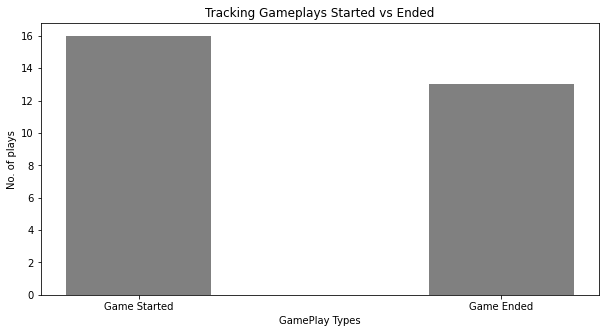

In [21]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(xlabels, ylabels, color ='gray',
        width = 0.4)
 
plt.xlabel("GamePlay Types")
plt.ylabel("No. of plays")
plt.title("Tracking Gameplays Started vs Ended")
plt.show()

In [25]:
timeremainingList = data['TimeRemainingOnEnd'].dropna().to_list()

In [30]:
timeremainingList

[1.50015,
 12.6401,
 15.832720000000002,
 6.202468,
 17.75037,
 3.481785,
 18.22878,
 25.35419]

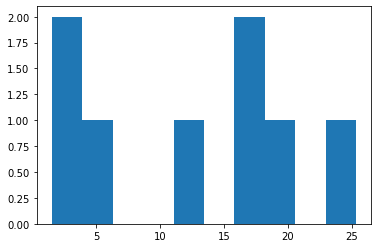

In [29]:
plt.hist(timeremainingList, histtype ='bar')
plt.show()

### Analytics graph #2 

In [68]:
xlabel = list(np.arange(0,5))
xlabel = [str(i*5) + "-" + str((i+1) *5) + "s" for i in xlabel]
xlabel

['0-5s', '5-10s', '10-15s', '15-20s', '20-25s']

In [69]:
from collections import defaultdict, OrderedDict
ret_dict = defaultdict(lambda: 0)
for num in timeremainingList:
    ret_dict[num//5] += 1

In [70]:
ret_dict = OrderedDict(sorted(ret_dict.items()))

In [71]:
data = {'values': ylabel, 'xlabel': xlabel}
data

{'values': [2, 1, 1, 3, 1],
 'xlabel': ['0-5s', '5-10s', '10-15s', '15-20s', '20-25s']}

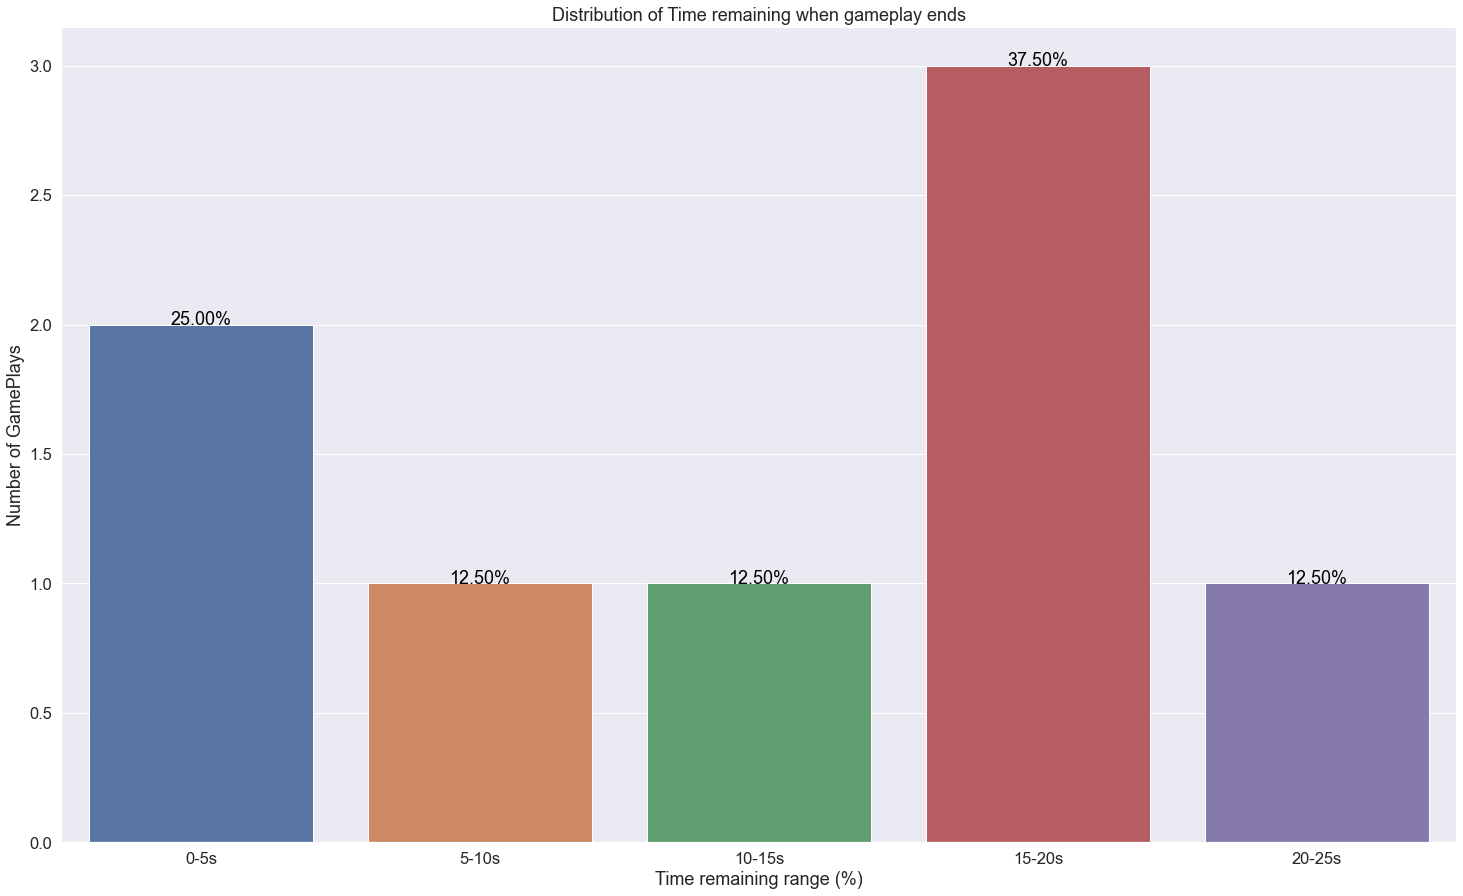

In [76]:
data = {'values': ylabel, 'xlabel': xlabel}
sum_containers = np.sum(ylabel)
sns.set(font_scale=1.5)
plt.figure(figsize = (25,15))
ax = sns.barplot(x="xlabel", y="values", data=data)
ax.set(xlabel='Time remaining range (%)', ylabel = 'Number of GamePlays')
heights = []
widths = []
for i in ax.patches:
    heights.append(i.get_height())
    widths.append(i.get_width())
rsum = 0
for index in range(len(data['values'])):
    ax.text(rsum, heights[index], "{0:.2f}%".format(100*(data['values'][index]/sum_containers)) , color='black', ha="center")
    rsum = rsum + widths[index] + 0.2
    plt.title('Distribution of Time remaining when gameplay ends')

